In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# 生成数据
def compute_y(w, dw):
    w = w[w != 1]
    y = (-np.cos(w + 1) + 1) / (2 * (w + 1)) + (np.cos(w - 1) - 1) / (2 * (w - 1))
    w1 = w
    y1 = (-np.cos((w1 + 1) * (1 + dw)) + 1) / (2 * (w1 + 1)) + (np.cos((w1 - 1) * (1 + dw)) - 1) / (2 * (w1 - 1))
    return w, y, y1

# 绘制图表
def plot(dw):
    w = np.linspace(0, 100, 1000)
    w, y, y1 = compute_y(w, dw)
    
    plt.figure(figsize=(10, 6))
    plt.plot(w, y, label='y', color='blue')
    plt.plot(w, y1, label='y1', color='orange')
    
    # 添加图例
    plt.legend()
    
    # 添加标题和轴标签
    plt.title('Comparison of Different y Functions')
    plt.xlabel('w')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# 使用ipywidgets创建滑动条
interact(plot, dw=FloatSlider(value=5.28, min=0, max=10, step=0.01, description='dw'))


interactive(children=(FloatSlider(value=5.28, description='dw', max=10.0, step=0.01), Output()), _dom_classes=…

<function __main__.plot(dw)>

### 上面说明了探测范围的增长对傅里叶函数形状的影响
但是我们并没有完全依靠这个函数，所以更重要的是比较采样点的变化。
因此只画采样点看一下。
### 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# 生成数据
def compute_y1(dw):
    w = np.arange(2 * np.pi, 300, 2 * np.pi)
    w = w[w != 1]
    y = (-np.cos(w + 1) + 1) / (2 * (w + 1)) + (np.cos(w - 1) - 1) / (2 * (w - 1))

    w1 = np.arange(2 * np.pi / (1 + dw), 300, 2 * np.pi / (1 + dw))
    w1 = w1[w1 != 1]
    y1 = (-np.cos((w1 + 1) * (1 + dw)) + 1) / (2 * (w1 + 1)) + (np.cos((w1 - 1) * (1 + dw)) - 1) / (2 * (w1 - 1))
    
    return w, y, w1, y1

# 绘制图表
def plot(dw):
    w, y, w1, y1 = compute_y1(dw)
    
    plt.figure(figsize=(10, 6))
    #plt.plot(w, y, label='y', color='blue')
    #plt.plot(w1, y1, label='y1', color='orange')
    
    # 使用plt.scatter标注数据点
    plt.scatter(w, y, color='blue', s=10)  # 标注第一个函数的点
    plt.scatter(w1, y1, color='orange', s=10)  # 标注第二个函数的点
    
    # 添加图例
    #plt.legend()
    
    # 添加标题和轴标签
    plt.title('Comparison of Different y Functions')
    plt.xlabel('w')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# 使用ipywidgets创建滑动条
interact(plot, dw=FloatSlider(value=5.28, min=0, max=10, step=0.01, description='dw'))

interactive(children=(FloatSlider(value=5.28, description='dw', max=10.0, step=0.01), Output()), _dom_classes=…

<function __main__.plot(dw)>

/tmp/ipykernel_2729821/541814026.py:5: RuntimeWarning: divide by zero encountered in divide
  y = (np.sin(2*np.pi+T)/(4*np.pi/T+2)-np.sin(2*np.pi-T)/(4*np.pi/T-2))*T


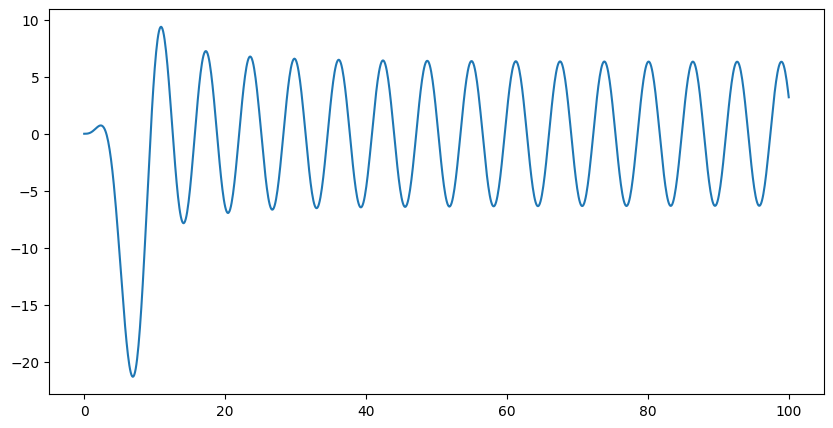

In [6]:
# 计算一下窗口之间频率点的迁移怎么实现
# 原始频率点(2*n*pi/T,(-cos(2npi+T)+1)/(4npi/T+2)+(cos(2npi-T)-1)/(4npi/T-2))
# 我们把频率点的位置固定下来
T = np.linspace(0,100,1000)
y = (np.sin(2*np.pi+T)/(4*np.pi/T+2)-np.sin(2*np.pi-T)/(4*np.pi/T-2))*T
plt.figure(figsize=(10,5))
plt.plot(T,y)
plt.show()
# 可以发现近似服从一个指数增长的正弦波的形状。
# 是对这个函数如此还是对全体函数都成立？
# 可以看到幅值是发散形状的

In [20]:
# 同样可以观察第二第三等位置的幅值随着这个窗口增长的变化情况
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
def position_am(n=1):
    T = np.linspace(0,1000,10000)
    y = (np.sin(2*n*np.pi+T)/(4*n*np.pi/T+2)-np.sin(2*n*np.pi-T)/(4*n*np.pi/T-2))
    return T,y
# 绘制图表
def plot(dw):
    T,y = position_am(dw)
    plt.figure(figsize=(10,5))
    plt.plot(T,y)
    plt.show()
# 可以看到函数形状是趋于稳定的
# 由于我们已知频率点实在
# 使用ipywidgets创建滑动条
interact(plot, dw=FloatSlider(value=10, min=0, max=40, step=1, description='dw'))

interactive(children=(FloatSlider(value=10.0, description='dw', max=40.0, step=1.0), Output()), _dom_classes=(…

<function __main__.plot(dw)>

In [21]:
# 同样可以观察第二第三等位置的幅值随着这个窗口增长的变化情况
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
def position_am(n=1):
    T = np.linspace(0,1000,10000)
    y = (np.sin(2*n*np.pi+T)/(4*n*np.pi/T+2)-np.sin(2*n*np.pi-T)/(4*n*np.pi/T-2))
    return T,y
# 绘制图表
def plot(dw):
    T,y = position_am(dw)
    plt.figure(figsize=(10,5))
    plt.plot(T,y)
    plt.show()
# 可以看到函数形状是趋于稳定的
# 由于我们已知频率点实在
# 使用ipywidgets创建滑动条
interact(plot, dw=FloatSlider(value=16, min=0, max=40, step=1, description='dw'))

interactive(children=(FloatSlider(value=16.0, description='dw', max=40.0, step=1.0), Output()), _dom_classes=(…

<function __main__.plot(dw)>